## ***Temel Bilesenler Analizi (PCA)***

Bu ödevde, 70000 gri tonlamaladan ve 28x28 görüntüden oluşan bir görüntü veri kümesi olan moda MNIST veri kümesiyle çalışacağız. Veri kümesi aşağıdaki gibi 10 sınıfı içerir:

Tişört/Üst, Pantolon, Kazak, Elbise, Ceket, Sandalet, Gömlek, Spor ayakkabı, Sırt çantası, Bilek boyu bot

- Rasgele 10000 görüntü seçin ve aşağıdaki alıştırmalarda bu örnek üzerinde çalışın:

- Veri setini yükleyin ve verileri normalleştirmek gibi ön işlemlerinizi (preprocessing) yapın.
- Verilere PCA uygulayın ve ilk iki ana bileşeni elde edin.
- İlk iki ana bileşeni kullanarak, derste yaptığımız gibi veri noktalarını renklendirerek ve sınıflandırarak veri grafiğini çizin.
- PCA çözümünün tatmin edici olduğunu düşünüyor musunuz? Farklı sınıfları kolayca ayırt edebiliyor musunuz?


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

- Veri setini yukleyelim.

In [2]:
# veri setini sklearn.datasetsin fonksiyonu olan fetch_openmlile elde edebiliriz
mnist = fetch_openml('Fashion-MNIST', version=1, cache=True)

In [21]:
mnist.data.shape

(70000, 784)

- Veriden rasgele 10000 orneklem secelim.

In [22]:
np.random.seed(123)

indices = np.random.choice(70000,10000)
X = mnist.data[indices] / 255.0
y = mnist.target[indices]

print(X.shape, y.shape)

(10000, 784) (10000,)


In [23]:
np.unique(X).shape

(256,)

- Bu veri seti icin PCA uygulamadan once verileri standartlastirmaya gerek yok.

In [8]:
# X_std = StandardScaler().fit_transform(X)

- PCA uygulayalim.

In [24]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X)

- Iki temel bilesen boyutuyla verileri gorsellestirelim.

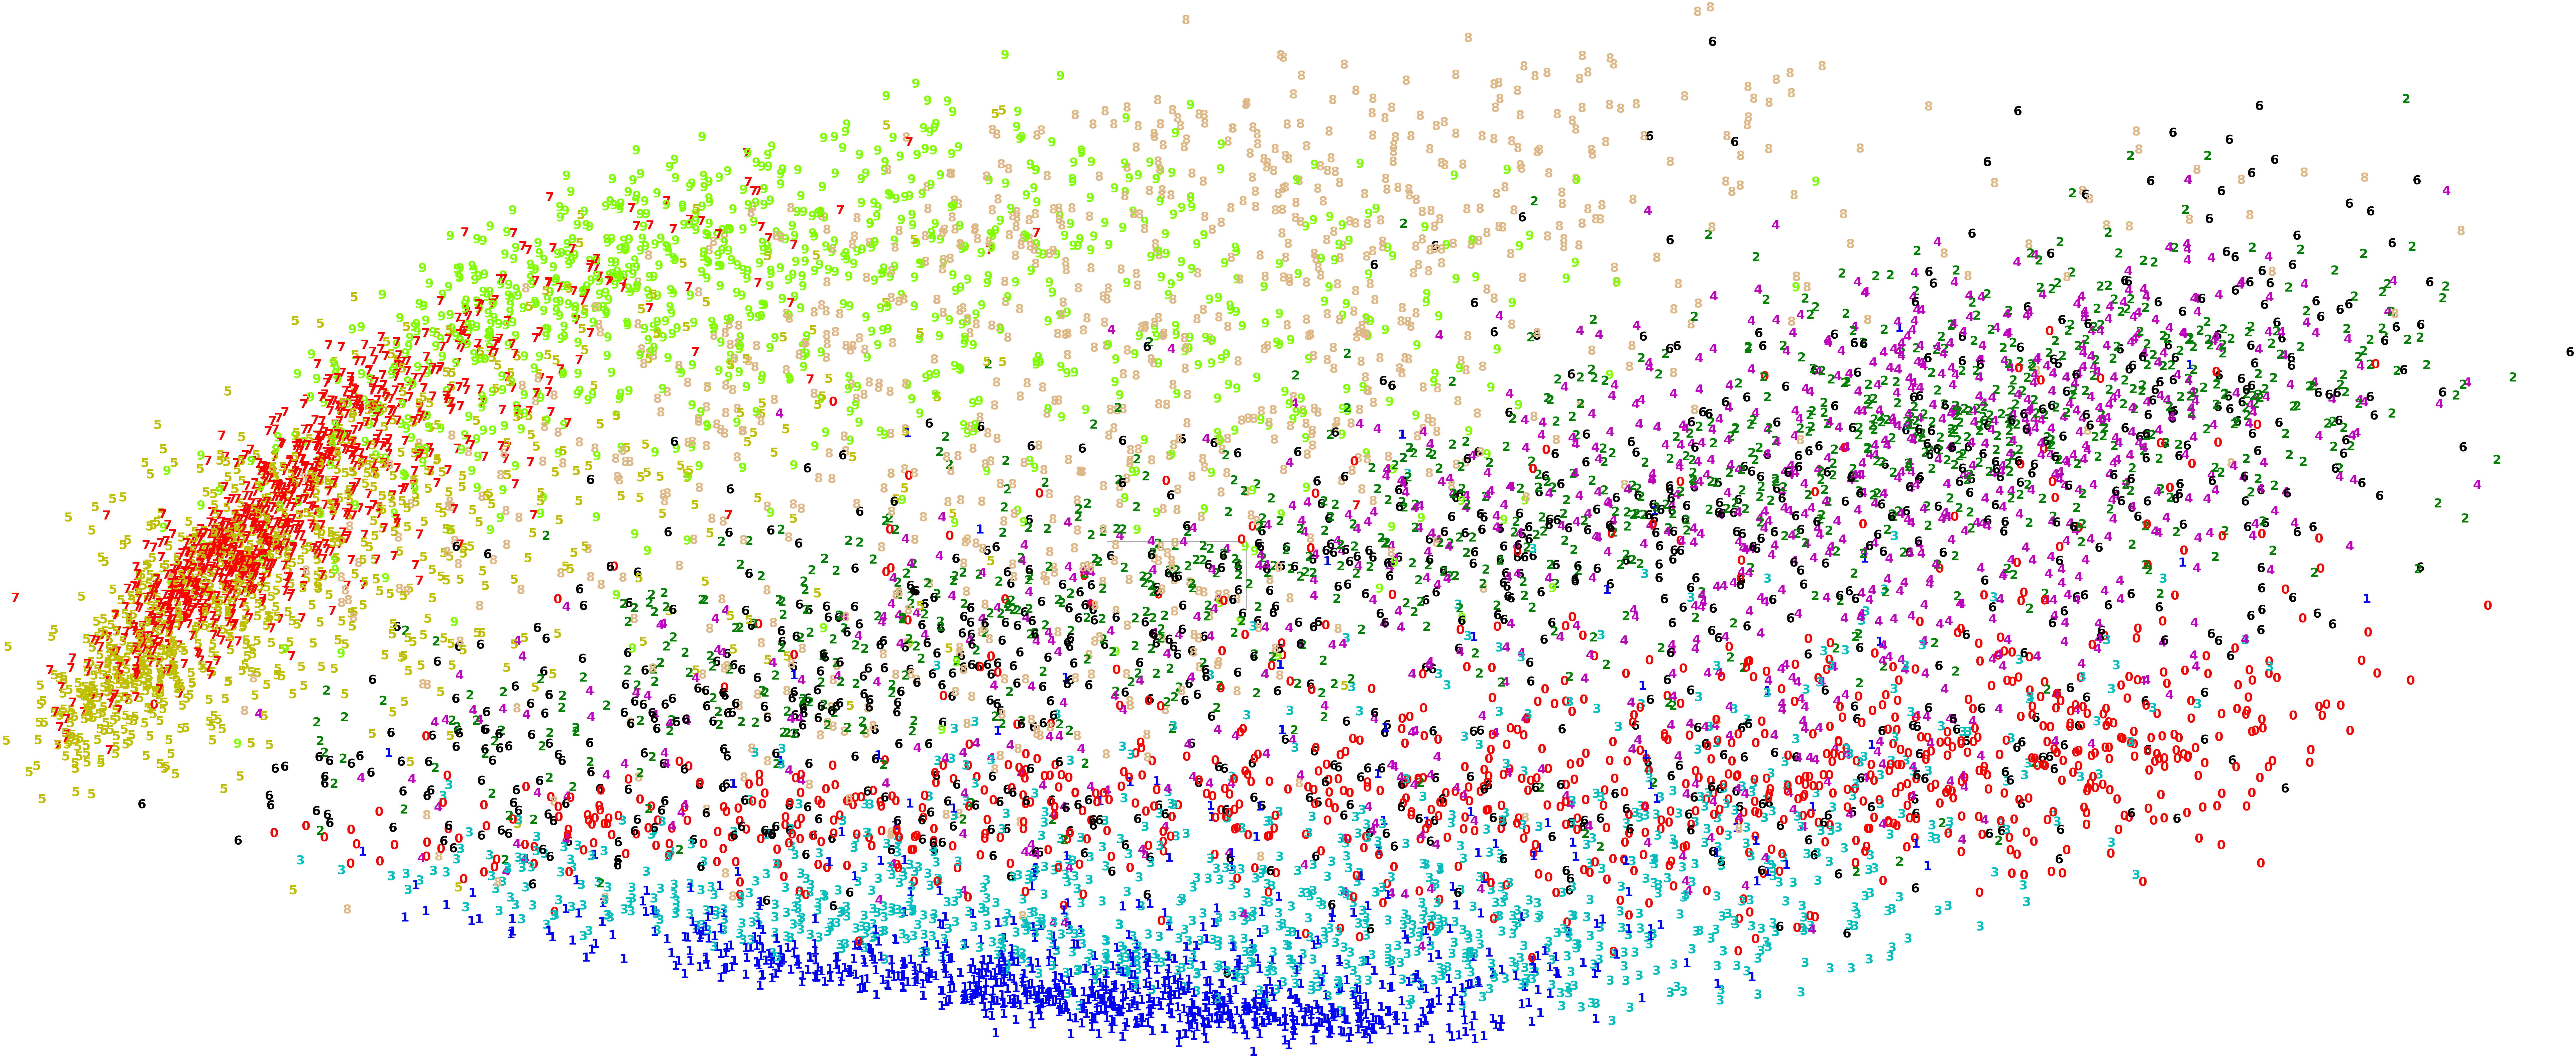

In [25]:
f = plt.figure(figsize=(10,5))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(pca_components.shape[0]):
    plt.text(pca_components[i, 0], pca_components[i, 1], str(y[i]),
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.show()

- Grafigi incelemek icin png dosyasi olarak kaydedebiliriz.

In [26]:
# grafigi dosyaya kaydetmek icin
f.savefig("./data/fashion.png", bbox_inches='tight')

- Grafik incelendiginde farkli siniflarin icice gectigi gorulmektedir. Bu veri setinde PCA cozumu farkli siniflari ayirt etmede cok basarili olmamistir.